Reference

1. [Detailed Explanation and Python Implementation of Q-Learning Algorithm in OpenAI Gym (Cart-Pole)](https://www.youtube.com/watch?v=KMjQmG5Uzis)


### Basic Imports

In [3]:
import matplotlib.pyplot as plt
import torch
import gymnasium as gym
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
# List of environments
list(gym.envs.registry.keys())

['CartPole-v0',
 'CartPole-v1',
 'MountainCar-v0',
 'MountainCarContinuous-v0',
 'Pendulum-v1',
 'Acrobot-v1',
 'phys2d/CartPole-v0',
 'phys2d/CartPole-v1',
 'phys2d/Pendulum-v0',
 'LunarLander-v2',
 'LunarLanderContinuous-v2',
 'BipedalWalker-v3',
 'BipedalWalkerHardcore-v3',
 'CarRacing-v2',
 'Blackjack-v1',
 'FrozenLake-v1',
 'FrozenLake8x8-v1',
 'CliffWalking-v0',
 'Taxi-v3',
 'tabular/Blackjack-v0',
 'tabular/CliffWalking-v0',
 'Reacher-v2',
 'Reacher-v4',
 'Pusher-v2',
 'Pusher-v4',
 'InvertedPendulum-v2',
 'InvertedPendulum-v4',
 'InvertedDoublePendulum-v2',
 'InvertedDoublePendulum-v4',
 'HalfCheetah-v2',
 'HalfCheetah-v3',
 'HalfCheetah-v4',
 'Hopper-v2',
 'Hopper-v3',
 'Hopper-v4',
 'Swimmer-v2',
 'Swimmer-v3',
 'Swimmer-v4',
 'Walker2d-v2',
 'Walker2d-v3',
 'Walker2d-v4',
 'Ant-v2',
 'Ant-v3',
 'Ant-v4',
 'Humanoid-v2',
 'Humanoid-v3',
 'Humanoid-v4',
 'HumanoidStandup-v2',
 'HumanoidStandup-v4',
 'GymV21Environment-v0',
 'GymV26Environment-v0']

In [5]:
env = gym.make("CartPole-v0")
observation, info = env.reset(seed=42)

/Users/nipun/miniconda3/lib/python3.9/site-packages/gymnasium/envs/registration.py:513: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


In [6]:
env.action_space

Discrete(2)

In [7]:
env.action_space.sample()

1

In [8]:
env.action_space.sample()

1

In [9]:
print(env.observation_space)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


In [10]:
observation

array([ 0.0273956 , -0.00611216,  0.03585979,  0.0197368 ], dtype=float32)

In [11]:
action = env.action_space.sample()
print(action)

0


In [12]:
observation, reward, terminated, truncated, info = env.step(action)


In [13]:
print(observation, reward, terminated, truncated, info)

[ 0.02727336 -0.20172954  0.03625453  0.32351476] 1.0 False False {}


In [14]:
observation, reward, terminated, truncated, info = env.step(action)
print(observation, reward, terminated, truncated, info)

[ 0.02323877 -0.39734846  0.04272482  0.62740684] 1.0 False False {}


In [15]:
observation, info = env.reset(seed=42)
for i in range(100):
    action = 1
    observation, reward, terminated, truncated, info = env.step(action)
    print(observation, reward, terminated, truncated, info)
    if terminated:
        break
    

[ 0.02727336  0.18847767  0.03625453 -0.26141977] 1.0 False False {}
[ 0.03104291  0.38306385  0.03102613 -0.5424507 ] 1.0 False False {}
[ 0.03870419  0.5777363   0.02017712 -0.8251987 ] 1.0 False False {}
[ 0.05025892  0.7725766   0.00367314 -1.111468  ] 1.0 False False {}
[ 0.06571045  0.96765006 -0.01855621 -1.4029963 ] 1.0 False False {}
[ 0.08506345  1.1629975  -0.04661614 -1.7014222 ] 1.0 False False {}
[ 0.1083234   1.3586243  -0.08064459 -2.0082438 ] 1.0 False False {}
[ 0.13549589  1.554488   -0.12080947 -2.3247683 ] 1.0 False False {}
[ 0.16658565  1.7504818  -0.16730483 -2.652048  ] 1.0 False False {}
[ 0.20159529  1.9464185  -0.22034578 -2.9908078 ] 1.0 True False {}


In [16]:
observation, info = env.reset(seed=42)
for i in range(100):
    action = 0
    observation, reward, terminated, truncated, info = env.step(action)
    print(observation, reward, terminated, truncated, info)
    if terminated:
        break
    

[ 0.02727336 -0.20172954  0.03625453  0.32351476] 1.0 False False {}
[ 0.02323877 -0.39734846  0.04272482  0.62740684] 1.0 False False {}
[ 0.0152918  -0.5930399   0.05527296  0.9332334 ] 1.0 False False {}
[ 0.003431   -0.7888622   0.07393762  1.2427603 ] 1.0 False False {}
[-0.01234624 -0.9848512   0.09879284  1.5576583 ] 1.0 False False {}
[-0.03204326 -1.1810076   0.129946    1.8794562 ] 1.0 False False {}
[-0.05566342 -1.3772845   0.16753513  2.209486  ] 1.0 False False {}
[-0.0832091  -1.573571    0.21172485  2.5488186 ] 1.0 True False {}


In [17]:
for _ in range(100):
   action = env.action_space.sample()  # this is where you would insert your policy
   observation, reward, terminated, truncated, info = env.step(action)

   if terminated or truncated:
      observation, info = env.reset()



/Users/nipun/miniconda3/lib/python3.9/site-packages/gymnasium/envs/classic_control/cartpole.py:180: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


In [18]:
# Now, let us take only the action 1
observation, info = env.reset(seed=42)
for i in range(100):
   action = 0  # this is where you would insert your policy
   observation, reward, terminated, truncated, info = env.step(action)

   if terminated or truncated:
        print("Episode finished after {} timesteps".format(i+1))
        observation, info = env.reset()

Episode finished after 8 timesteps
Episode finished after 17 timesteps
Episode finished after 27 timesteps
Episode finished after 37 timesteps
Episode finished after 46 timesteps
Episode finished after 54 timesteps
Episode finished after 64 timesteps
Episode finished after 73 timesteps
Episode finished after 83 timesteps
Episode finished after 93 timesteps


In [41]:
# Create a q table
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n


In [42]:
i = 1
bins = np.linspace(env.observation_space.low[i], env.observation_space.high[i], num_bins[i] + 1)[1:-1]

In [43]:
np.digitize([env.observation_space.low[2]], bins)

array([1])

In [44]:
# Define the number of bins for each dimension
num_bins = [4, 4, 4, 4]  # Adjust these values based on your preference

# Discretize the continuous state space
def discretize_state(state, num_bins):
    state_discrete = []
    for i in range(len(state)):
        bins = np.linspace(env.observation_space.low[i], env.observation_space.high[i], num_bins[i] + 1)[1:-1]
        state_discrete.append(np.digitize(state[i], bins))
    return tuple(state_discrete)


# Initialize Q-table with zeros
q_table = 1e-2*torch.randn(num_bins + [env.action_space.n])

def update_q_table(q_table, state, action, reward, next_state, learning_rate, discount_factor):
    state = tuple(state)
    next_state = tuple(next_state)
    q_table[state][action] = (1 - learning_rate) * q_table[state][action] + learning_rate * (reward + discount_factor * torch.max(q_table[next_state]))

    return q_table

In [45]:
q_table

tensor([[[[[ 7.5282e-03, -5.0158e-03],
           [ 1.8066e-04, -1.1957e-02],
           [ 1.7809e-02,  1.9935e-02],
           [ 1.2077e-02,  1.2135e-03]],

          [[ 1.1068e-02,  1.3167e-02],
           [-3.6065e-03, -2.3091e-02],
           [-5.3917e-03, -3.6806e-03],
           [-2.0194e-02,  1.4977e-02]],

          [[-3.9683e-03, -1.1291e-03],
           [ 1.6093e-03,  1.7743e-02],
           [ 3.1133e-03, -1.3254e-02],
           [-2.2300e-03,  1.5660e-02]],

          [[-9.9277e-03, -3.0461e-03],
           [ 1.5977e-02, -9.5863e-03],
           [ 9.4414e-03, -4.6137e-03],
           [-6.0294e-03,  3.8514e-03]]],


         [[[ 3.2934e-03, -2.7038e-03],
           [ 1.1472e-03, -7.2562e-03],
           [ 7.2273e-03, -7.4928e-03],
           [-3.5465e-03, -1.3511e-02]],

          [[-1.1883e-02, -3.6573e-03],
           [-9.0871e-03, -1.4479e-02],
           [ 1.2498e-04,  2.4612e-03],
           [-1.4339e-02, -3.3635e-03]],

          [[ 1.4458e-02,  2.2707e-02],
           

In [46]:
# Learn the q table

# Hyperparameters
learning_rate = 0.1
discount_factor = 0.9


In [47]:
# Learn q-table without epsilon greedy approach and print rewards
num_episodes = 50
render_mode = False

    

In [48]:
# Print all possible states
print("All possible states:")
print(env.observation_space)

All possible states:
Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


In [49]:
# Print some sample states
for _ in range(10):
    state = env.observation_space.sample()
    print("Sample State:", state)

Sample State: [-2.1946154e+00 -2.5122178e+38  8.9282773e-02 -1.3416754e+38]
Sample State: [ 2.7149630e-01  1.2149416e+37 -9.9354312e-02 -1.2340108e+38]
Sample State: [ 4.0275431e+00 -2.6682660e+38 -2.4785740e-02  2.4654679e+38]
Sample State: [-2.3548093e-01 -6.2527667e+37  3.5589758e-01 -4.8273950e+37]
Sample State: [ 1.6777289e+00 -6.2703186e+37  3.0708086e-01  1.9350419e+38]
Sample State: [-2.8664367e+00 -9.9032201e+37 -4.1302589e-01  3.0742409e+38]
Sample State: [-2.4482067e+00 -6.4236516e+37 -1.9836776e-01  2.5115714e+38]
Sample State: [-4.2023139e+00 -1.8168436e+37 -6.5094754e-02  1.7452279e+38]
Sample State: [-2.8398631e+00 -3.0210992e+38 -1.6737616e-01 -2.1272714e+38]
Sample State: [-2.1986934e-04  9.8844897e+36 -7.7146210e-02 -7.3564386e+37]


In [50]:
eps = 1.0
num_episodes = 2000
rewards = []  # List to store rewards for each episode

# Training loop
for episode in range(num_episodes):
    eps = eps * 0.99
    print("Episode:", episode)
    state, info = env.reset(seed=episode)
    state = discretize_state(state, num_bins)
    episode_reward = 0

    while True:
        # Choose action using the current Q-table or explore the environment
        if np.random.random() > eps:
            action = torch.argmax(q_table[state]).item()
        else:
            action = env.action_space.sample()

        # Take the chosen action and observe the next state and reward
        next_state, reward, terminated, truncated, info = env.step(action)
        next_state = discretize_state(next_state, num_bins)

        # Update the Q-table using the Q-learning update rule
        q_table = update_q_table(q_table, state, action, reward, next_state, learning_rate, discount_factor)

        episode_reward += reward
        state = next_state

        if truncated or terminated:
            break
    rewards.append(episode_reward)
    print("Episode reward:", episode_reward)

# Print the learned Q-table
print("Learned Q-table:")
print(q_table)

Episode: 0
Episode reward: 26.0
Episode: 1
Episode reward: 24.0
Episode: 2
Episode reward: 15.0
Episode: 3
Episode reward: 15.0
Episode: 4
Episode reward: 14.0
Episode: 5
Episode reward: 18.0
Episode: 6
Episode reward: 34.0
Episode: 7
Episode reward: 15.0
Episode: 8
Episode reward: 30.0
Episode: 9
Episode reward: 12.0
Episode: 10
Episode reward: 23.0
Episode: 11
Episode reward: 21.0
Episode: 12
Episode reward: 17.0
Episode: 13
Episode reward: 23.0
Episode: 14
Episode reward: 18.0
Episode: 15
Episode reward: 24.0
Episode: 16
Episode reward: 13.0
Episode: 17
Episode reward: 12.0
Episode: 18
Episode reward: 9.0
Episode: 19
Episode reward: 15.0
Episode: 20
Episode reward: 20.0
Episode: 21
Episode reward: 14.0
Episode: 22
Episode reward: 16.0
Episode: 23
Episode reward: 24.0
Episode: 24
Episode reward: 18.0
Episode: 25
Episode reward: 21.0
Episode: 26
Episode reward: 10.0
Episode: 27
Episode reward: 11.0
Episode: 28
Episode reward: 37.0
Episode: 29
Episode reward: 18.0
Episode: 30
Episode r

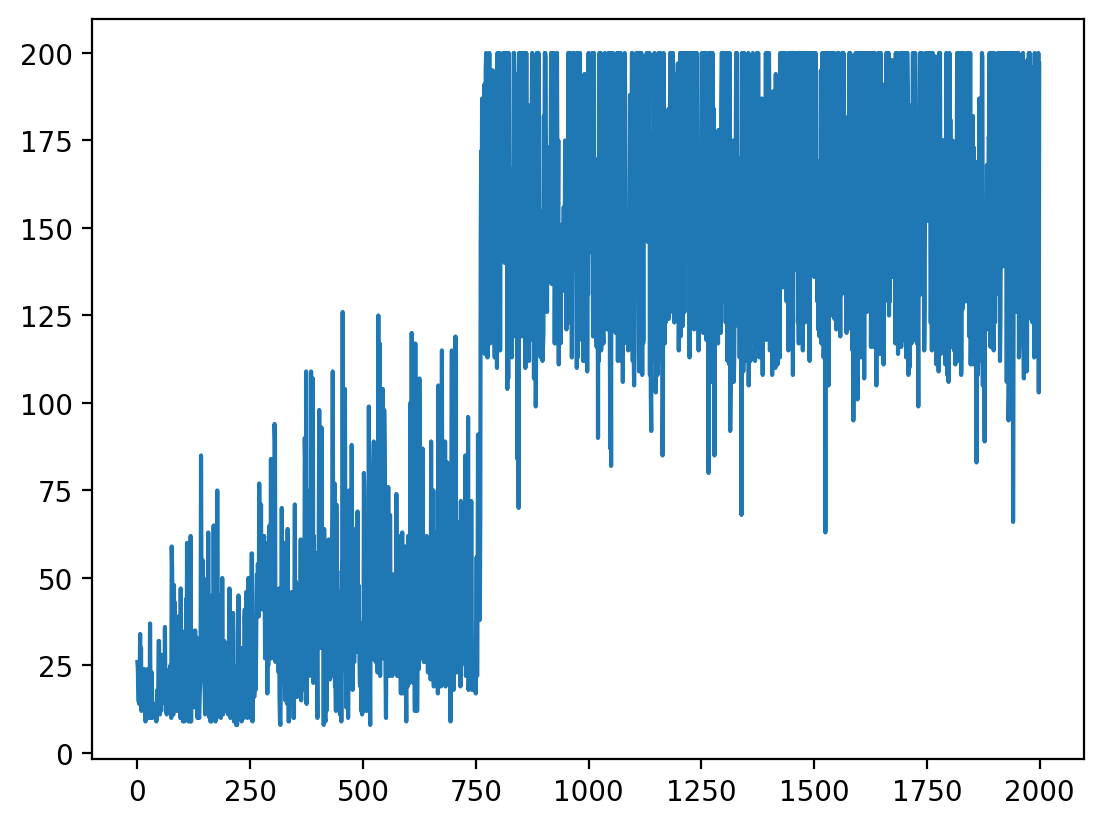

In [51]:
plt.plot(rewards)

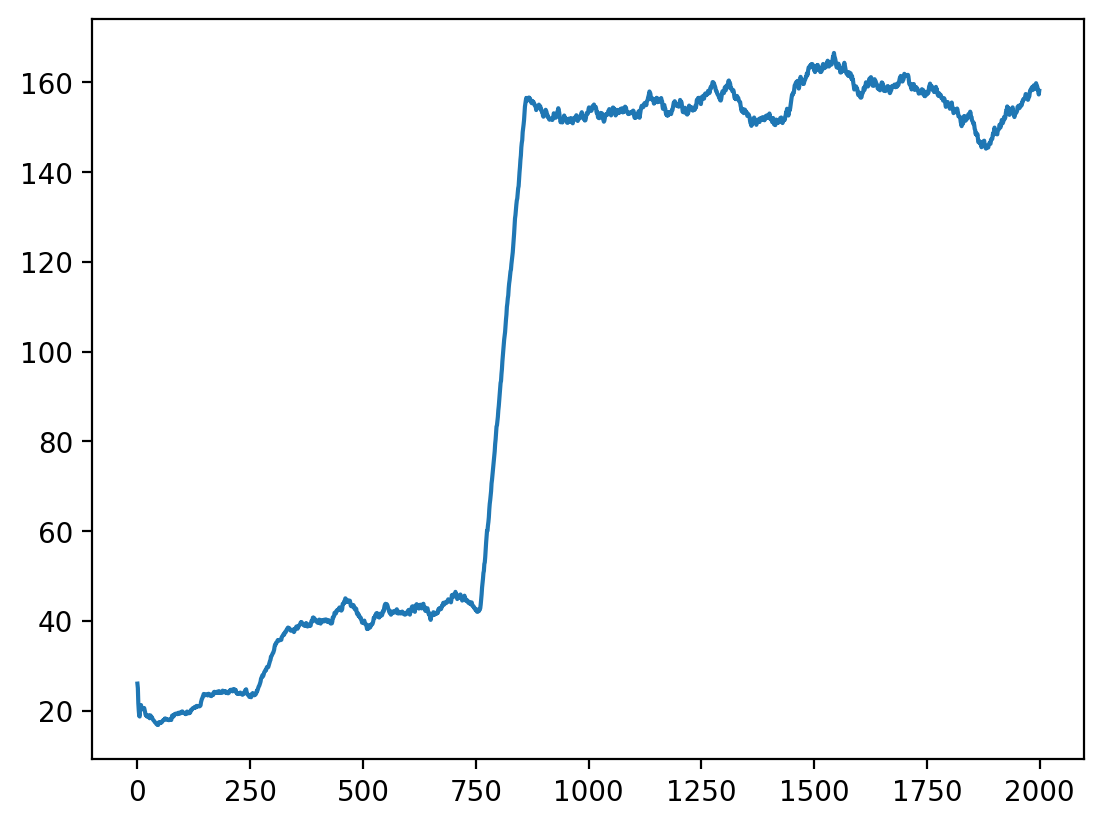

In [52]:
# Smooth the rewards and plot
def smooth_rewards(rewards, smoothing_factor=100):
    smoothed_rewards = []
    for i in range(len(rewards)):
        smoothed_rewards.append(np.mean(rewards[max(0, i-smoothing_factor):(i+1)]))
    return smoothed_rewards

plt.plot(smooth_rewards(rewards))

In [17]:
# Simple MLP for CartPole

import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dims=[32, 32]):
        super(MLP, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hidden_dims = hidden_dims

        self.fc1 = nn.Linear(self.input_dim, self.hidden_dims[0])
        self.fc2 = nn.Linear(self.hidden_dims[0], self.hidden_dims[1])
        self.fc3 = nn.Linear(self.hidden_dims[1], self.output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        q_values = self.fc3(x)
        return q_values

In [18]:
mlp = MLP(input_dim=4, output_dim=2, hidden_dims=[32, 32])

In [19]:
mlp

MLP(
  (fc1): Linear(in_features=4, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=2, bias=True)
)

In [20]:
mlp(torch.tensor([1, 2, 3, 4], dtype=torch.float32))

tensor([-0.0455, -0.0736], grad_fn=<AddBackward0>)

In [22]:
mlp(torch.from_numpy(env.observation_space.sample()))

tensor([ 3.7970e+35, -1.6602e+37], grad_fn=<AddBackward0>)

In [23]:
# Train the MLP

# Hyperparameters
learning_rate = 0.1
discount_factor = 0.9
num_episodes = 50

# Initialize the MLP
mlp = MLP(input_dim=4, output_dim=2, hidden_dims=[32, 32])

# Define the loss function
loss_fn = nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.Adam(mlp.parameters(), lr=learning_rate)

# List to store rewards for each episode
rewards = []

# Training loop
for episode in range(num_episodes):
    print("Episode:", episode)
    state, info = env.reset(seed=episode)
    state = torch.from_numpy(state).float()
    episode_reward = 0

    while True:
        # Choose action using the current Q-table
        q_values = mlp(state)
        action = torch.argmax(q_values).item()

        # Take the chosen action and observe the next state and reward
        next_state, reward, terminated, truncated, info = env.step(action)
        next_state = torch.from_numpy(next_state).float()

        # Update the Q-table using the Q-learning update rule
        q_values_next = mlp(next_state)
        q_values_target = q_values.clone()
        q_values_target[action] = reward + discount_factor * torch.max(q_values_next)
        loss = loss_fn(q_values, q_values_target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        episode_reward += reward
        state = next_state

        if terminated or truncated:
            break
    rewards.append(episode_reward)
    print("Episode reward:", episode_reward)

Episode: 0
Episode reward: 8.0
Episode: 1
Episode reward: 9.0
Episode: 2
Episode reward: 10.0
Episode: 3
Episode reward: 10.0
Episode: 4
Episode reward: 10.0
Episode: 5
Episode reward: 9.0
Episode: 6
Episode reward: 9.0
Episode: 7
Episode reward: 10.0
Episode: 8
Episode reward: 9.0
Episode: 9
Episode reward: 10.0
Episode: 10
Episode reward: 10.0
Episode: 11
Episode reward: 9.0
Episode: 12
Episode reward: 9.0
Episode: 13
Episode reward: 10.0
Episode: 14
Episode reward: 10.0
Episode: 15
Episode reward: 9.0
Episode: 16
Episode reward: 8.0
Episode: 17
Episode reward: 9.0
Episode: 18
Episode reward: 9.0
Episode: 19
Episode reward: 9.0
Episode: 20
Episode reward: 8.0
Episode: 21
Episode reward: 10.0
Episode: 22
Episode reward: 8.0
Episode: 23
Episode reward: 8.0
Episode: 24
Episode reward: 10.0
Episode: 25
Episode reward: 9.0
Episode: 26
Episode reward: 8.0
Episode: 27
Episode reward: 8.0
Episode: 28
Episode reward: 10.0
Episode: 29
Episode reward: 9.0
Episode: 30
Episode reward: 8.0
Episode

In [24]:
mlp

MLP(
  (fc1): Linear(in_features=4, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=2, bias=True)
)

In [25]:
mlp(torch.from_numpy(env.observation_space.sample()).float())

tensor([-inf, nan], grad_fn=<AddBackward0>)